# Real estate analytics with tabular data


## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

**Problem Definition:**
In this analysis, we were provided with a dataset containing information on more than 21,613 house sales in King County, USA. Our primary objectives were as follows:

a) Evaluate the performance of two regression models, namely linear regression and neural networks, for predicting house prices. Determine which model provides better estimation performance and provide reasoning for the choice.

b) Transform the house price attribute from a numeric value into a nominal attribute, categorizing houses with prices of 450,000 or more as "High_Price" and those with prices less than 450,000 as "Low_Price." Evaluate the performance of two classification models, neural networks, and another model of choice, for predicting these price categories. Identify which model exhibits superior classification performance and explain the rationale behind the selection.

**Proposed Approaches:**
For both problems, we applied neural network models and explored various experiments to compare their performance with other machine learning algorithms, including linear regression, random forest, and logistic regression.

**Major Findings:**
In addressing the first problem of predicting house prices, we found that a neural network model with multiple layers, each comprising many neurons (where one neuron corresponds to a linear regression algorithm), outperformed other models. By adding more layers to the neural network, the model was better learn from historical data and patterns, resulting in higher accuracy and lower Mean Absolute Error (MAE). Therefore, this "Best Model" achieved the highest correlation between predicted and actual values, as well as the lowest MAE, making it the preferred choice for price estimation.

For the second problem of classifying houses as "High_Price" or "Low_Price" based on the transformed price attribute, we compared the performance of two classification models: neural networks and other models (logistics regression and random forest). Model 3, the neural network, demonstrated superior performance with higher accuracy, a higher Kappa score indicating better agreement with true values, and a slightly higher F-Measure. Model 1, which used logistic regression, consistently lagged behind the other models in all three metrics.

In conclusion, based on the findings and evaluations, there is the adoption of neural network models, especially for price estimation and price categorisation. These models exhibit strong potential for enhancing decision-making processes in the real estate domain.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Load data

In [ ]:
import pandas as pd
#import dataset
df = pd.read_csv('Part1_house_price.csv')
#check the number of columns and rows in the dataset
print('Number of records read: ', df.shape)
df.head()

Number of records read:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Check if there is any missing value

In [ ]:
# Finding column types
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

As can be reffered table, there is no missing value within this dataset.
Since the ID, Date, Latitude and Longtitude are irrelevant to the house price, thus, we need to remove those variables for a better prediction accuracy.

In [ ]:
#Drop irrelevant attributes to the price
df.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)
#Get a quick summary statistics of the attributes
df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


This table summarizes various statistics for a dataset related to housing prices. Here's a breakdown of the key information:

- price: The dataset contains information on the price of houses, with a minimum price of 75,000, a maximum price of 7,700,000, and an average price of approximately 540,182.

- bedrooms: The number of bedrooms in the houses ranges from 0 to 33, with an average of approximately 3.37 bedrooms.

- bathrooms: The number of bathrooms in the houses ranges from 0 to 8, with an average of approximately 2.11 bathrooms.

- sqft_living: The square footage of the living space in the houses ranges from 290 to 13,540 square feet, with an average of approximately 2,080 square feet.

- sqft_lot: The size of the lots associated with the houses ranges from 520 to 1,651,359 square feet, with an average of approximately 15,107 square feet.

- floors: The number of floors in the houses ranges from 1 to 3.5, with an average of approximately 1.49 floors.

- waterfront: This appears to be a binary variable (0 or 1) indicating whether a house has waterfront property, with an average of approximately 0.007 (suggesting that very few houses have waterfront property).

- view: This also appears to be a binary variable (0 or 1) indicating whether a house has a view, with an average of approximately 0.234 (indicating that some houses have a view).

- condition: The condition of houses in the dataset ranges from 1 to 5, with an average of approximately 3.41.

- grade: The grade of houses in the dataset ranges from 1 to 13, with an average of approximately 7.66.

- sqft_above: The square footage of the living space above ground level ranges from 290 to 9,410 square feet, with an average of approximately 1,788 square feet.

- sqft_basement: The square footage of the basement space ranges from 0 to 4,820 square feet, with an average of approximately 291.51 square feet.

- yr_built: The year houses were built ranges from 1900 to 2015

- yr_renovated: The year houses were renovated ranges from 0 (indicating no renovation) to 2015, with an average renovation year of approximately 84.40 (likely indicating limited renovations).

- zipcode: The dataset includes houses from various zip codes.

- sqft_living15: The square footage of the living space in 2015 (likely an updated value) ranges from 399 to 6,210 square feet, with an average of approximately 1,987 square feet.

- sqft_lot15: The size of the lots in 2015 (likely an updated value) ranges from 651 to 871,200 square feet, with an average of approximately 12,768 square feet.

It is noticeable that zipcode is formatted in a numerical form yet presenting a categorical meaning. Thus, this attribute needs transforming with one-hot-coded for further analysis with the house price.

In [ ]:
# Apply one-hot-coded for 'zipcode' attribute
df_zipcode= pd.get_dummies(df['zipcode'], prefix='zip')
df_new = pd.concat([df, df_zipcode], axis=1, join='inner')
#label price column
label_col = 'price'
#drop zipcode column
df_new.drop(['zipcode'],axis=1, inplace=True)
df_new.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,...,1,0,0,0,0,0,0,0,0,0
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0


<a id = "cell_model"></a>
## 3. Predictive Modeling

**TASK A**

LINEAR REGRESSION MODEL

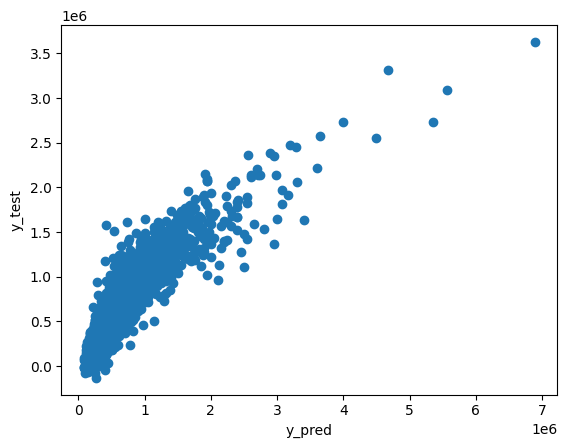

The Correlation between true and predicted values is:  0.896
Mean Absolute Error: 98157.59484458093
R-squared: 0.8029247623758228


In [ ]:
#Load some neccessary python libraries
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df_new.drop(['price'], axis=1)
y = df_new['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred)

# plot
plt.scatter(y_test, y_pred)
plt.ylabel('y_test')
plt.xlabel('y_pred')
plt.show()

# Printing the results
corr_result = np.corrcoef(y_test, y_pred)
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

The results are related to the evaluation of a linear regression model used to predict housing prices. Let's break down and explain each of these results:

- Correlation between True and Predicted Values (0.896):

The correlation value of 0.896 indicates a strong positive linear relationship between the true (actual) values and the predicted values generated by the linear regression model. In other words, there's a high degree of linear alignment between the model's predictions and the actual outcomes.
- Mean Absolute Error (MAE): 98157.59484458093

The Mean Absolute Error (MAE) is a measure of the average absolute difference between the true values and the predicted values. In this case, the MAE is approximately 98,157.59.
This means that, on average, the model's predictions have an absolute error of about $98,157.59 when compared to the actual values. The MAE provides a straightforward measure of prediction accuracy.
- R-squared (R²): 0.8029247623758228

R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (the target) that is explained by the independent variables (the features) in the model.
An R-squared value of 0.803 (approximately 80.3%) suggests that the linear regression model explains about 80.3% of the variance in the target variable.
In other words, the model accounts for a significant portion of the variability in the data.
Higher R-squared values are generally better, as they indicate that the model fits the data well and can explain a larger portion of the observed variation.

NEURAL NETWORK MODEL

In [ ]:
#load `Sklearn` and its wrappers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


#Split data for training and validation. Split index ranges into three parts
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df_new_train, df_new_valid = train_test_split(df_new,
                                      test_size=valid_size,
                                      random_state=2020)

#Extract data for training and validation into x and y vectors.
df_y_train = df_new_train[[label_col]] #training output
df_x_train = df_new_train.drop(label_col, axis=1) #training input
df_y_valid = df_new_valid[[label_col]] #validation output (salesprice)
df_x_valid = df_new_valid.drop(label_col, axis=1) #validation input

#create a scaling model using training set and use it to scale both training and validation data
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_x_train)
df_x_train = pd.DataFrame(scaler.transform(df_x_train),
                            columns = df_x_train.columns, index = df_x_train.index)
df_x_valid = pd.DataFrame(scaler.transform(df_x_valid),
                            columns = df_x_valid.columns, index = df_x_valid.index)


Construct Deep Learning Sequential Model

In [ ]:
#Load required libraries for Deep Learning with Sequential model.
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

#Convert pandas data frames to np arrays.
arr_x_train = np.array(df_x_train)
arr_y_train = np.array(df_y_train)
arr_x_valid = np.array(df_x_valid)
arr_y_valid = np.array(df_y_valid)

def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))#20% of the data will be dropped in order to not to overfit
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae]) # RMSprop is adopted as the optimizer, mae = mean absolute error is used to evaluate the model performance
    return(t_model)

#apply the executable model
model = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 86        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_5 (Dense)             (None, 180)               360       
                                                                 
 dense_6 (Dense)             (None, 20)                3620      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,087
Trainable params: 4,087
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
history = model.fit(arr_x_train, arr_y_train,
    batch_size=64, #the number of samples used for each iteration=64
    epochs=500, #training rounds = 500
    shuffle=True, #suffle your training data at the start of each round
    verbose=2, #controls the amount of info printed during training
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
237/237 - 1s - loss: 420833067008.0000 - mean_absolute_error: 536042.7500 - val_loss: 426880860160.0000 - val_mean_absolute_error: 537122.2500 - 1s/epoch - 6ms/step
Epoch 2/500
237/237 - 1s - loss: 399731687424.0000 - mean_absolute_error: 515759.3750 - val_loss: 388719902720.0000 - val_mean_absolute_error: 500339.2812 - 508ms/epoch - 2ms/step
Epoch 3/500
237/237 - 0s - loss: 341984903168.0000 - mean_absolute_error: 455594.8750 - val_loss: 309377466368.0000 - val_mean_absolute_error: 413662.5625 - 486ms/epoch - 2ms/step
Epoch 4/500
237/237 - 1s - loss: 252401844224.0000 - mean_absolute_error: 344715.8125 - val_loss: 205647888384.0000 - val_mean_absolute_error: 277389.8438 - 510ms/epoch - 2ms/step
Epoch 5/500
237/237 - 1s - loss: 170188865536.0000 - mean_absolute_error: 253688.0000 - val_loss: 142778925056.0000 - val_mean_absolute_error: 223364.0312 - 528ms/epoch - 2ms/step
Epoch 6/500
237/237 - 1s - loss: 150030008320.0000 - mean_absolute_error: 249671.9219 - val_loss: 13957

Evaluate the Performance

203/203 [==============================] - 0s 1ms/step


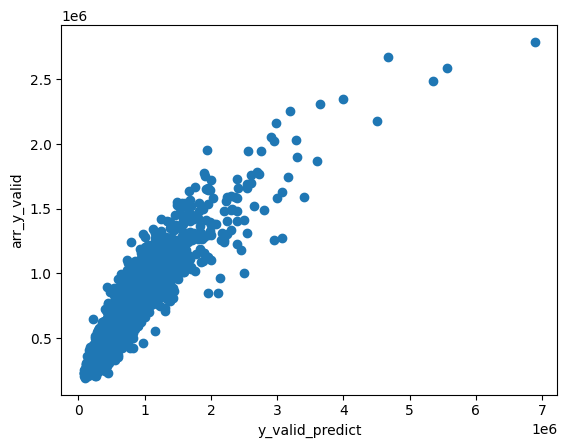

The Correlation between true and predicted values is:  0.923
Train MAE:  92340.72 , Train Loss:  28244131840.0
Val MAE:  92262.2 , Val Loss:  29944238080.0


In [ ]:
#Evaluate the performance based on MAE and MSE (Loss) metrics
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

#Plot the predicted and the true values
y_valid_predict = model.predict(arr_x_valid)
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

#Calculate the correlation between true and predicted values
corr_result = np.corrcoef(arr_y_valid.reshape(1,6484)[0], y_valid_predict.reshape(1,6484)[0])

#Print the results
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))
print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Let's break down and explain each of the results:

- Correlation between True and Predicted Values (0.923):

The correlation value of 0.923 indicates a strong positive linear relationship between the true (actual) values and the predicted values generated by the model. In other words, the model's predictions are highly aligned with the actual prices of the houses.
- Train MAE (Mean Absolute Error): 92340.72

The Mean Absolute Error (MAE) is a measure of the average absolute difference between the true prices and the predicted prices on the training dataset
In this case, a train MAE of 92340.72 means that, on average, the model's predictions on the training data are off by approximately $92,340.72 when compared to the actual prices.
A lower MAE indicates better model performance, so a smaller value would be desirable. However, the interpretation of "good" or "bad" performance depends on the context and the specific problem.
- Train Loss: 28,244,131,840.0

The training loss represents the value of the loss function (often a mean squared error or some other regression loss) on the training data.
In this case, the training loss is a very large number (2.824 billion). It's a measure of how well the model's predictions match the actual values during training. A smaller training loss indicates a better fit of the model to the training data.
- Val MAE (Mean Absolute Error): 92262.2

Similar to the training MAE, the validation MAE measures the average absolute difference between the true prices and the predicted prices, but it's calculated on a separate validation dataset.
A validation MAE of 92262.2 means that, on average, the model's predictions on the validation data are off by approximately $92,262.20 when compared to the actual prices.
- Val Loss: 29,944,238,080.0

The validation loss represents the value of the loss function on the validation data.
In this case, the validation loss is also a very large number (29.944 billion). It's an indication of how well the model generalizes to new, unseen data. A smaller validation loss indicates better generalization.

**TASK B**

In [ ]:
# Create a new column "Price_Category"
# For new category_price column, 1 for "high price", and 0 for "low price" based on the given conditions
df_new['Category_Price'] = df_new['price'].apply(lambda price: int(1) if price >= 450000 else int(0))
df2 = df_new.drop(['price'], axis=1)

Apply similar data preprocessing as Task 1A

In [ ]:
from tensorflow.keras.utils import to_categorical

#Split data for training and validation. Split index ranges into three parts
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df2_train, df2_valid = train_test_split(df2,
                                      test_size=valid_size,
                                      random_state=2020)
#labelling the Category_Price
new_label_col = 'Category_Price'

#Extract data for training and validation into x and y vectors.
price_y_train = df2_train[[new_label_col]]
price_x_train = df2_train.drop(new_label_col, axis=1)
price_y_valid = df2_valid[[new_label_col]]
price_x_valid = df2_valid.drop(new_label_col, axis=1)

#Apply scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(price_x_train)
price_x_train = pd.DataFrame(scaler.transform(price_x_train),
                            columns = price_x_train.columns, index = price_x_train.index)
price_x_valid = pd.DataFrame(scaler.transform(price_x_valid),
                            columns = price_x_valid.columns, index = price_x_valid.index)

#Convert pandas data frames to np arrays.
arr_x_train = np.array(price_x_train)
arr_y_train = np.array(price_y_train)
arr_x_valid = np.array(price_x_valid)
arr_y_valid = np.array(price_y_valid)

# convert class vectors to binary class matrices
arr_y_train = to_categorical(arr_y_train, 2)
arr_y_valid = to_categorical(arr_y_valid, 2)


Construct Neural Network model

In [ ]:
def basic_model_3():
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(85,)))
    t_model.add(Dense(2, activation='softmax'))
    t_model.summary()
    return(t_model)

#Apply executable model
model = basic_model_3()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               8600      
                                                                 
 dense_24 (Dense)            (None, 2)                 202       
                                                                 
Total params: 8,802
Trainable params: 8,802
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               8600      
                                                                 
 dense_24 (Dense)            (None, 2)                 202       
                                                                 
Total params: 8,802
Trainable 

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy

#compile and fit model
model.compile(optimizer=Nadam(learning_rate=0.005),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=200,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/200
237/237 - 3s - loss: 0.3107 - accuracy: 0.8687 - val_loss: 0.2632 - val_accuracy: 0.8794 - 3s/epoch - 11ms/step
Epoch 2/200
237/237 - 1s - loss: 0.2499 - accuracy: 0.8923 - val_loss: 0.2359 - val_accuracy: 0.8965 - 505ms/epoch - 2ms/step
Epoch 3/200
237/237 - 1s - loss: 0.2407 - accuracy: 0.8957 - val_loss: 0.2353 - val_accuracy: 0.8974 - 521ms/epoch - 2ms/step
Epoch 4/200
237/237 - 1s - loss: 0.2363 - accuracy: 0.8973 - val_loss: 0.2285 - val_accuracy: 0.9004 - 532ms/epoch - 2ms/step
Epoch 5/200
237/237 - 1s - loss: 0.2327 - accuracy: 0.8999 - val_loss: 0.2231 - val_accuracy: 0.9027 - 512ms/epoch - 2ms/step
Epoch 6/200
237/237 - 1s - loss: 0.2298 - accuracy: 0.8987 - val_loss: 0.2382 - val_accuracy: 0.8981 - 575ms/epoch - 2ms/step
Epoch 7/200
237/237 - 1s - loss: 0.2257 - accuracy: 0.9025 - val_loss: 0.2236 - val_accuracy: 0.9031 - 563ms/epoch - 2ms/step
Epoch 8/200
237/237 - 1s - loss: 0.2230 - accuracy: 0.9036 - val_loss: 0.2190 - val_accuracy: 0.9089 - 588ms/epoch - 2ms

Evaluate the Performance

In [ ]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Accuracy: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val Accuracy: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


# Make predictions on the test set
y_pred = model.predict(arr_x_valid)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
arr_y_valid = np.argmax(arr_y_valid, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(arr_y_valid, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(arr_y_valid, y_pred_multiclass)

# Print the report
print("The result of the classification report is: \n ",report)

Train Accuracy:  0.95 , Train Loss:  0.11
Val Accuracy:  0.89 , Val Loss:  0.39
203/203 [==============================] - 0s 1ms/step
The result of Kappa is : 0.788
The result of the classification report is: 
                precision    recall  f1-score   support

           0       0.89      0.90      0.89      3127
           1       0.90      0.89      0.90      3357

    accuracy                           0.89      6484
   macro avg       0.89      0.89      0.89      6484
weighted avg       0.89      0.89      0.89      6484



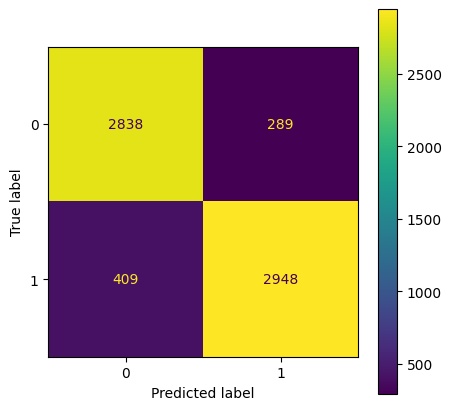

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(
    arr_y_valid,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm)

# Create a figure with a fixed size
fig = plt.figure(figsize=(5, 5))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

Result interpretation:

- Kappa Score (0.788):

The Kappa score of 0.788 suggests substantial agreement between the model's predictions and the actual values, adjusted for random agreement. It indicates that the model's predictions are significantly better than what would be expected by chance.

- Classification Report:

The classification report provides a detailed breakdown of evaluation metrics for each class in the binary classification task.
Precision, Recall, and F1-Score:

For class 0 (low price), the precision is 0.89, indicating that 89% of the instances predicted as class 0 were correctly classified as class 0. The recall (sensitivity) is 0.90, meaning that 90% of the actual class 0 instances were correctly identified. The F1-score, which balances precision and recall, is 0.89 for class 0.

For class 1 (high price), the precision is 0.90, indicating that 90% of the instances predicted as class 1 were correctly classified as class 1. The recall is 0.89, meaning that 89% of the actual class 1 instances were correctly identified. The F1-score is 0.90 for class 1.
- Accuracy (0.89):

The overall accuracy of the model is 0.89 (89%). This indicates that the model correctly predicted the class labels for approximately 89% of the instances in the test data.
- Macro Avg and Weighted Avg:

Both macro and weighted averages for precision, recall, and F1-score are approximately 0.89. These aggregate metrics provide an average over all classes and are consistent with the individual class metrics.

In summary, the results suggest that the model is performing very well for this binary classification task. It exhibits strong accuracy, high precision, recall, and F1-scores for both classes, and a substantial Kappa score, indicating reliable and accurate predictions.

APPLY RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split  # Import train_test_split if not already imported

# Define your target variable and features
X = df2.drop('Category_Price', axis=1)
y = df2['Category_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

# Creating a Random Forest Classifier model
model = RandomForestClassifier()  # Use RandomForestClassifier instead of LogisticRegression

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("The result of Kappa is:", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("The result of the classification report is:\n", report)

The result of Kappa is: 0.778
The result of the classification report is:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      3127
           1       0.90      0.88      0.89      3357

    accuracy                           0.89      6484
   macro avg       0.89      0.89      0.89      6484
weighted avg       0.89      0.89      0.89      6484



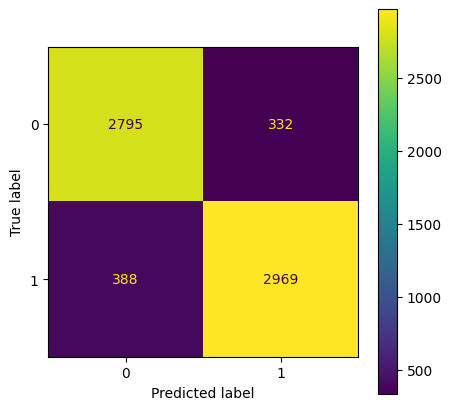

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test,
    y_pred)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm)

# Create a figure with a fixed size
fig = plt.figure(figsize=(5, 5))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

Let's break down the results:

- Kappa Score (0.778):

The Kappa score is a measure of agreement between the model's predictions and the true values, adjusted for the possibility of random agreement.
A Kappa score of 0.785 indicates substantial agreement between the model's predictions and the actual values. It suggests that the model's predictions are significantly better than what would be expected by chance.

- Classification Report:

For class 0 (low price), the precision is 0.87. This means that 87% of the instances predicted as class 0 were correctly classified as class 0. The recall (also called sensitivity) is 0.91, indicating that 91% of the actual class 0 instances were correctly identified by the model. The F1-score, which balances precision and recall, is 0.89.

For class 1 (high price), the precision is 0.91, meaning that 91% of the instances predicted as class 1 were correctly classified as class 1. The recall is 0.88, indicating that 88% of the actual class 1 instances were correctly identified. The F1-score is also 0.89.
- Accuracy (0.89):

The overall accuracy of the model is 0.89 (89%). This indicates that the model correctly predicted the class labels for approximately 89% of the instances in the test data.

- Macro Avg and Weighted Avg:

These are aggregated metrics that provide an average over all classes. In this case, both macro and weighted averages for precision, recall, and F1-score are approximately 0.89, which is consistent with the individual class metrics.

In summary, the model appears to perform well with an accuracy of 89% and a substantial Kappa score of 0.785, indicating good agreement between predictions and true values. Additionally, the precision, recall, and F1-scores for both classes are relatively high, suggesting that the model is effective at distinguishing between the two classes.

<a id = "cell_report"></a>
## 4. Experiments Report

**TASK A**

Different experiments were conducted between the neural network model and linear regression to evaluate the performance


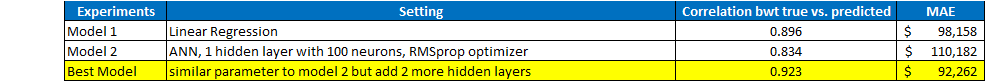

Let's analyze the models and their performance based on these metrics:

1. **Model 1 (Linear Regression)**:

Correlation: 0.896

MAE: $98,158

2. **Model 2 (Artificial Neural Network - ANN with 1 hidden layer):**

Correlation: 0.834

MAE: $110,182

3. **Best Model (Similar to Model 2 but with 2 additional hidden layers)**:

Correlation: 0.923

MAE: $92,262


Now, let's compare and evaluate these models:

*Correlation between True and Predicted Values:*

The "Best Model" has the highest correlation of 0.923, indicating a strong linear relationship between its predictions and the actual values.
Model 1 also has a strong correlation of 0.896, while Model 2 has a slightly lower correlation of 0.834.

*Mean Absolute Error (MAE):*

The "Best Model" has the lowest MAE of 92,262. This means that, on average, its predictions are off by approximately 92,262 when compared to the actual values.
Model 1 has a slightly higher MAE of 98,158.
Model 2 has the highest MAE of 110,182, indicating larger prediction errors on average.

Based on the provided results and settings, the "Best Model" is the preferred choice for estimation. Here's why:

The "Best Model" is computed with more layers comprising of many neurons (1 neuron = linear regression algorithm). Adding more layers to the model will help to learn more about the historical data and the pattern to predict better.
Therefore, the "Best Model" not only has the highest correlation but also the lowest MAE, making it the better choice for estimation based on the provided results and settings.

**Task B**

Different experiments were conducted between the neural network model and logistics regression and random forest to evaluate the performance

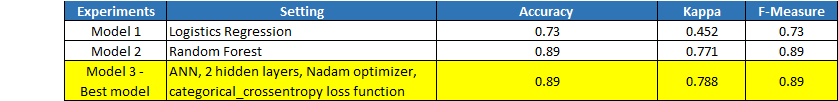

Let's analyze and compare the models based on these metrics:

1. **Model 1 (Logistic Regression)**:

- Accuracy: 0.73

- Kappa: 0.452

- F-Measure: 0.73
2. **Model 2 (Random Forest):**

- Accuracy: 0.89
- Kappa: 0.771
- F-Measure: 0.89
3. **Model 3 (ANN with 2 hidden layers, Nadam optimizer, categorical_crossentropy loss function)**:

- Accuracy: 0.89
- Kappa: 0.788
- F-Measure: 0.89

Now, let's evaluate and compare these models:

**Accuracy:**

Both Model 2 (Random Forest) and Model 3 (ANN) achieve the highest accuracy of 0.89. This means that they correctly predicted class labels for approximately 89% of the instances in the test data.
Model 1 (Logistic Regression) has a lower accuracy of 0.73, indicating lower predictive performance in terms of overall correct predictions.

**Kappa:**

Model 3 (ANN) has the highest Kappa score of 0.788, indicating substantial agreement between its predictions and actual values.
Model 2 (Random Forest) also has a good Kappa score of 0.771.
Model 1 (Logistic Regression) has the lowest Kappa score of 0.452, indicating less agreement between its predictions and the true values.

**F-Measure:**

Model 2 (Random Forest) and Model 3 (ANN) both have the highest F-Measure of 0.89. This indicates a good balance between precision and recall for both models.
Model 1 (Logistic Regression) also has an F-Measure of 0.73, which is lower than the other models.

Based on these metrics and evaluations: Model 2 (Random Forest) and Model 3  both have the same accuracy, indicating similar overall prediction correctness.
However, Model 3 has a higher Kappa score, suggesting better agreement between predictions and true values, and it also has a slightly higher F-Measure.
Model 1 (Logistic Regression) consistently lags behind the other models in all three metrics.

Therefore, Model 3, which is referred to as the "ANN" is the preferred choice among the three models. It achieves higher agreement with the true values, similar accuracy to Model 2, and better F-Measure.